Цель этого задания - создать котов, которых не существует. В ходе данного задания вы обучите GAN, который является одной из первых генеративных моделей.

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import os 
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import random
import numpy as np

import torchvision.datasets as datasets
import torchvision.transforms as transforms

%matplotlib inline

In [ ]:
def random_noise(batch_size, channels, side_size):
    return torch.randn(batch_size, channels, side_size, side_size).cuda()

def imagewide_average(x):
    return x.mean(dim=(-1, -2))

In [ ]:
def visualise(imgs, rows=2):
    imgs = (imgs.transpose(1, 3) + 1) / 2
    imgs = torch.cat([imgs[i::rows] for i in range(rows)], dim=1)
    cols = len(imgs)
    imgs = (torch.cat(list(imgs), dim=1)).cpu().numpy()[:, :, ::-1]
    plt.figure(figsize=(cols*1.5, rows*1.5))
    plt.imshow(imgs)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Загрузите на диск датасет с котами, затем можно создавать класс датасета.
Здесь приведено два способа создания датасета: мануальный (написанный ручками) и с помощью torchvision - сравните насколько просто использовать второй вариант.

In [ ]:
class CatDataset(Dataset):
    def __init__(self, path_to_dataset="/content/drive/MyDrive/cat_136/cat_136", size=64):
        self.photo_names = os.listdir(path_to_dataset)
        self.path_base = path_to_dataset
        self.size = size
    
    def __getitem__(self, index):
        path = self.path_base + "/" + self.photo_names[index]
        img = cv2.imread(path) # 136 x 136
        crop_rate = 8
        x_crop = random.randint(0, crop_rate)
        y_crop = random.randint(0, crop_rate)
        img = img[x_crop:136 - crop_rate + x_crop, y_crop:136 - crop_rate + y_crop]
        img = cv2.resize(img, (self.size, self.size), interpolation=cv2.INTER_CUBIC)
        return 2 * torch.tensor(img).float().transpose(0, 2) / 255. - 1
    
    def __len__(self):
        return len(self.photo_names)
        
dataset = CatDataset()

In [ ]:
dataset = datasets.ImageFolder("/content/drive/MyDrive/cat_136/", transforms.Compose([
            transforms.RandomResizedCrop(64),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            ]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/06.\ This\ Cat\ Does\ Not\ Exist/cat_136.zip -d /content/drive/MyDrive/cat_136

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/06. This Cat Does Not Exist/cat_136.zip
replace /content/drive/MyDrive/cat_136/cat_136/flickr_cat_000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


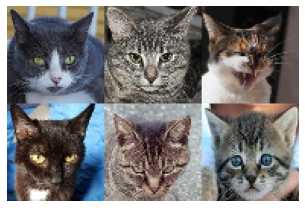

In [ ]:
dataset = CatDataset()
visualise(torch.cat([dataset[i].unsqueeze(0) for i in [3, 15, 182, 592, 394, 2941]], dim=0))

Сперва реализуйте генератор.

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, batch_size: int):
        return None 

Тепеь реализуйте дискриминатор:

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return None # torch.Tensor batch_size x 1

Здесь напишите код для обучения модели:

  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 1 | Discriminator loss: 0.2584751214320287 | Generator loss: 4.561111903523806


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 2 | Discriminator loss: 0.18056368414977866 | Generator loss: 5.337764554327319


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 3 | Discriminator loss: 0.5064259321997219 | Generator loss: 3.7532123537352367


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 4 | Discriminator loss: 0.7613590869109684 | Generator loss: 2.8051874861583945


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 5 | Discriminator loss: 0.7428090715728792 | Generator loss: 2.69174131788082


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 6 | Discriminator loss: 0.8081659997686143 | Generator loss: 2.4724932873841396


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 7 | Discriminator loss: 0.8548274902100472 | Generator loss: 2.27839395672268


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 8 | Discriminator loss: 0.8241180878100767 | Generator loss: 2.2320718107201296


  0%|          | 0/645 [00:00<?, ?it/s]

Epoch 9 | Discriminator loss: 0.7563843306180044 | Generator loss: 2.3376073564246576


  0%|          | 0/645 [00:00<?, ?it/s]

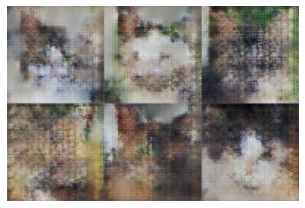

Epoch 10 | Discriminator loss: 0.7486958313987863 | Generator loss: 2.4403084412865015


  0%|          | 0/645 [00:00<?, ?it/s]

KeyboardInterrupt: ignored